Treves Li

UC Berkeley

2025-10-30 

Visualise rainfall.

# 1. Imports

In [1]:
# Standard libraries
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Set root path
root_path = Path.cwd().parents[0]

# 2. Visualise Rainfall Data

Get precipitation data from NOAA for **BERKELEY 2.0 NE** as csv: https://www.ncei.noaa.gov/access/past-weather/38.00795196033522,-122.92487358369794,37.49712071953917,-121.74038488363891

In [5]:
weather_df = pd.read_csv(root_path / 'data' / 'raw' / 'rainfall_data.csv', skiprows=1 )

# Make the date column a datetime type
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

# Filter for dates after a certain date
date_start = '2025-05-01' # TODO, 6 months before deployment
rainfall_df = weather_df[weather_df['Date'] > date_start]

# Keep only the PRCP column and rename it
rainfall_df = rainfall_df[['Date', 'PRCP (Inches)']].rename(columns={'PRCP (Inches)': 'precip_in'})
rainfall_df['precip_cum_in'] = rainfall_df['precip_in'].cumsum() # Cumulative

# Deployment dates # TODO
vlines = ['2025-11-23']
vlabels = ['Nov 23, 2025']

rainfall_df.to_csv(root_path / 'data' / 'processed' / 'rainfall_data_processed.csv', index=False)

Plot everything together.

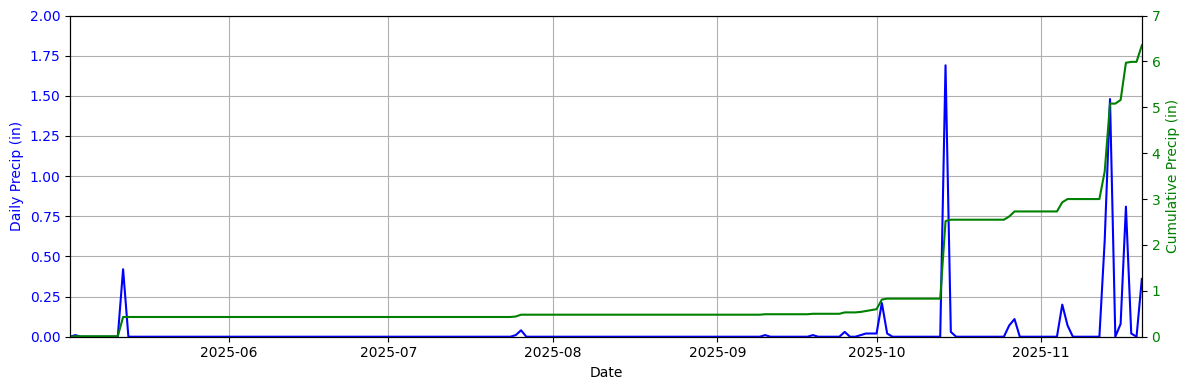

In [16]:
fig, ax1 = plt.subplots(figsize=(12, 4))

# --- Primary axis: daily precipitation ---
ax1.plot(rainfall_df['Date'], rainfall_df['precip_in'], color='blue', label='Daily Precip')
ax1.set_ylabel('Daily Precip (in)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# --- Secondary axis: cumulative precipitation ---
ax2 = ax1.twinx()
ax2.plot(rainfall_df['Date'], rainfall_df['precip_cum_in'], color='green', label='Cumulative Precip')
ax2.set_ylabel('Cumulative Precip (in)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# --- Title ---
# ax1.set_title('Daily and Cumulative Precipitation')

# --- Vertical lines with labels ---
# for date, label in zip(vlines, vlabels):
#     date = pd.to_datetime(date)
    
#     # Lines
#     ax1.axvline(date, color='red', linestyle='--', alpha=0.7)
    
#     # Label on primary axis
#     ax1.text(date, ax1.get_ylim()[1] * 0.95, label,
#              rotation=90, color='red', va='top', ha='right')

# --- X-axis formatting ---
ax1.set_xlabel('Date')
ax1.set_xlim(rainfall_df['Date'].min(), rainfall_df['Date'].max())

# --- Optional axis limits ---
ax1.set_ylim(0, 2)
ax2.set_ylim(0, 7)

plt.tight_layout()
plt.savefig(root_path / 'results' / 'figures' / 'rainfall_plot.png', dpi=300)
plt.show()